### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://dnh03940:072f6whc%2B12q9grj@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB

'Connected: dnh03940@BLUDB'

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table


In [4]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql DROP TABLE chicago_socioeconomic_data
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

##### You can verify that the table creation was successful by making a basic query like:


In [5]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?


In [6]:
%sql SELECT count(*) FROM chicago_socioeconomic_data

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [7]:
%sql SELECT count(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [8]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


### Problem 4

##### Which community area which has the highest hardship index?


In [9]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data)

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [10]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000

 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * ibm_db_sa://dnh03940:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


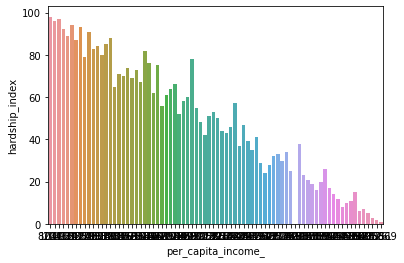

In [11]:
s_plot = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data

dataframe = s_plot.DataFrame()

%matplotlib inline
import seaborn

plot = seaborn.barplot(x='per_capita_income_',y='hardship_index', data=dataframe)

### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


## Summary

##### In this lab you learned how to store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries. You also visualized a portion of the data in the database to see what story it tells.
